In [57]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
import torchvision
# from torchdata.datapipes.iter import IterableWrapper, Mapper
import os
from skimage.io import imread
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

In [2]:
from utils import *

In [3]:
if torch.cuda.is_available():
    print("Good to go!")
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")

In [ ]:
test_dir='D:/SRNW/SR1/SR_testing_datasets/BSDS100'
transformer=transforms.Compose([ RandomCrop(54),
                                ToTensor(),
                                ToBlur(3),
                                SubUp(factor=2)
                                       ])
transformed_testset = Dataset( root_dir=test_dir,
                              repeat=1,
                            transform=transformer)
test_loader = DataLoader(transformed_testset, batch_size=16,
                        shuffle=True, num_workers=0)

In [39]:
test_dir='D:/SRNW/SR1/SR_testing_datasets/BSDS100'
transformer=transforms.Compose([ RandomCrop(54),
                                ToTensor(),
                                ToBlur(3),
                                SubUp(factor=2)
                                       ])
transformed_testset = Dataset( root_dir=test_dir,
                              repeat=1,
                            transform=transformer)
test_loader = DataLoader(transformed_testset, batch_size=16,
                        shuffle=True, num_workers=0)

In [40]:
# take one batch from the test_loader
test_iter=iter(test_loader)
one_batch=next(test_iter)

In [41]:
model=SuperReso()
model.load_state_dict(torch.load('model1135/model1135_100.pt',map_location='cpu'))
model.to(DEVICE)

SuperReso(
  (conv1): Conv2d(3, 128, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 3, kernel_size=(5, 5), stride=(1, 1))
)

In [42]:
hr,sr,img=convert_image_batch(model,one_batch,DEVICE)

In [69]:
img=plt.imread('D:/SRNW/GIT/RGB/comic.png')
img.shape

(181, 125, 4)

In [79]:
super_reso(model,'save/baboon.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


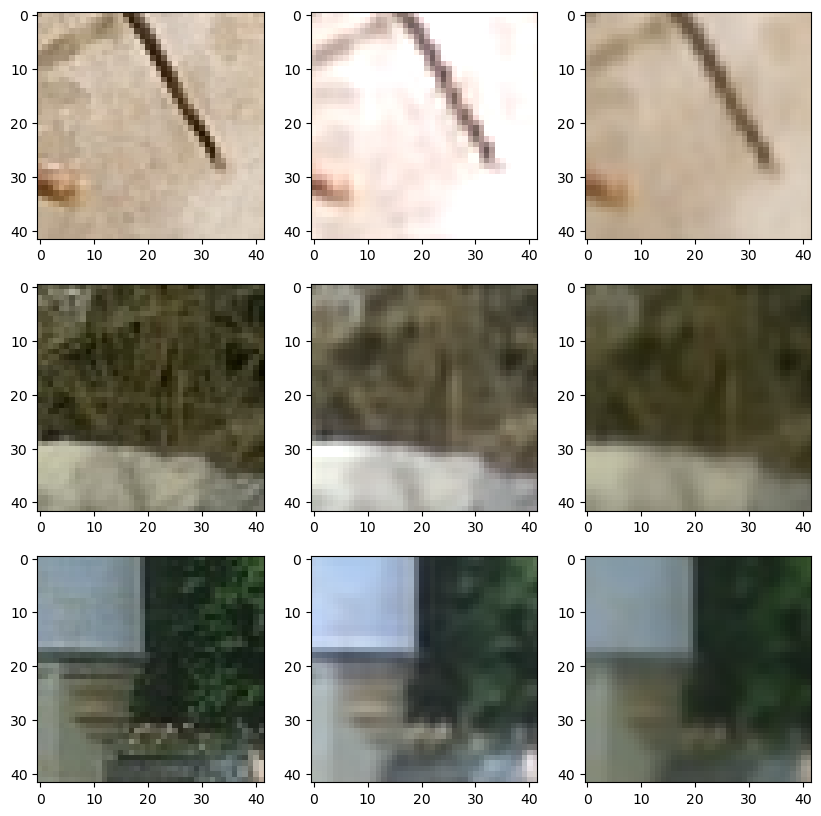

In [45]:
display_per(hr,sr,img,10)